In [13]:
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import cv2
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import utils
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import seaborn as sns
import pickle
from sklearn.metrics import confusion_matrix
import itertools

%matplotlib inline


In [14]:
def plot_results(mod_history, metric, epochs):
      
      # Check out our train loss and test loss over epochs.
      train_metric = mod_history.history[metric]
      val = 'val_' + metric
      test_metric = mod_history.history[val]

      # Set figure size.
      plt.figure(figsize=(12, 8))

      # Generate line plot of training, testing loss over epochs.
      plt.plot(train_metric, label=f'Training {metric}', color='#185fad')
      plt.plot(test_metric, label=f'Testing {metric}', color='orange')

      # Set title
      plt.title(f'Training and Testing {metric} by Epoch', fontsize = 25)
      plt.xlabel('Epoch', fontsize = 18)
      plt.ylabel('Categorical Crossentropy', fontsize = 18)
      plt.xticks(range(0,epochs,5), range(0,epochs,5))
      plt.legend(fontsize = 18);

In [15]:
def make_predictions(mod_name, steps=20):
    preds = mod_name.predict(X_test,steps=steps)
    preds = preds.argmax(axis=-1)

    y_test_labels = np.argmax(y_test, axis=-1)

    cm = confusion_matrix(y_test_labels,preds)

    plot_confusion_matrix(cm, cm_plot_labels, normalize=True,
                          title='Face Shape Normalized')

    plt.show()



In [16]:
cm_plot_labels = ['Heart','Oblong','Oval','Round', 'Square']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(16,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [17]:
def plot_summary_results(mod_name, mod_history, epochs):
    plot_results(mod_history, 'loss',epochs)
    plot_results(mod_history, 'accuracy', epochs)
    make_predictions(mod_name)

In [18]:
path = "C:/Users/whisn/FaceShape Dataset/data/"

# Pastikan path dan nama file digabung dengan benar
X_train = np.asarray(pickle.load(open(path + "X_train_apr.pickle", "rb")))
y_train = np.asarray(pickle.load(open(path + "y_train_apr.pickle", "rb")))
X_test = np.asarray(pickle.load(open(path + "X_test_apr.pickle", "rb")))
y_test = np.asarray(pickle.load(open(path + "y_test_apr.pickle", "rb")))


In [19]:
print("Data Summary")
print("--------------------")
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print("--------------------")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

Data Summary
--------------------
X_train shape (3999, 224, 224, 3)
y_train shape (3999, 5)
--------------------
X_test shape (1000, 224, 224, 3)
y_test shape (1000, 5)


In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model_1 = Sequential()
model_1.add(Conv2D(filters = 8,              # add this layer
                   kernel_size=3,
                   activation='relu',
                   input_shape=X_train.shape[1:]))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Conv2D(filters = 16,              # from 64
                   kernel_size=3,
                   activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Conv2D(filters = 64,             # from 128
                   kernel_size=3,
                   activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(filters = 128,            # from 256
                   kernel_size=3,
                   activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Flatten())
model_1.add(Dense(32, activation='relu'))    # reduce from 128 to 64 to 32
model_1.add(Dropout(0.5))  ##added
model_1.add(Dense(5, activation='softmax'))

model_1.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 222, 222, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 111, 111, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 109, 109, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 54, 54, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 52, 52, 64)          │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │         589,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 674,549 (2.57 MB)

 Trainable params: 674,549 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")


X_train shape: (3999, 224, 224, 3)
y_train shape: (3999, 5)


In [22]:
history_1 = model_1.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=80,
                        validation_data=(X_test, y_test))

Epoch 1/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 39s 207ms/step - accuracy: 0.2070 - loss: 1.6324 - val_accuracy: 0.2310 - val_loss: 1.6065
Epoch 2/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 144ms/step - accuracy: 0.2134 - loss: 1.6046 - val_accuracy: 0.2690 - val_loss: 1.5852
Epoch 3/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 143ms/step - accuracy: 0.2646 - loss: 1.5724 - val_accuracy: 0.2820 - val_loss: 1.5737
Epoch 4/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 143ms/step - accuracy: 0.2999 - loss: 1.5474 - val_accuracy: 0.3210 - val_loss: 1.5326
Epoch 5/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 144ms/step - accuracy: 0.3332 - loss: 1.5048 - val_accuracy: 0.3440 - val_loss: 1.5263
Epoch 6/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 142ms/step - accuracy: 0.3719 - loss: 1.4619 - val_accuracy: 0.3580 - val_loss: 1.5100
Epoch 7/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 142ms/step - accuracy: 0.3836 - loss: 1.4282 - val_accuracy: 0.3760 - val_loss: 1.5021
Epoch 8/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 142ms/step - accuracy: 0.4119 - loss: 1

In [23]:
# max validation score @ Epoch 115/150
max(history_1.history['val_accuracy'])

0.41600000858306885

In [24]:
model_1.evaluate(X_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.4139 - loss: 4.3600


[4.513440132141113, 0.39800000190734863]

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step
Normalized confusion matrix
[[0.4   0.155 0.21  0.125 0.11 ]
 [0.16  0.47  0.205 0.065 0.1  ]
 [0.215 0.19  0.305 0.155 0.135]
 [0.095 0.135 0.18  0.375 0.215]
 [0.15  0.105 0.17  0.135 0.44 ]]


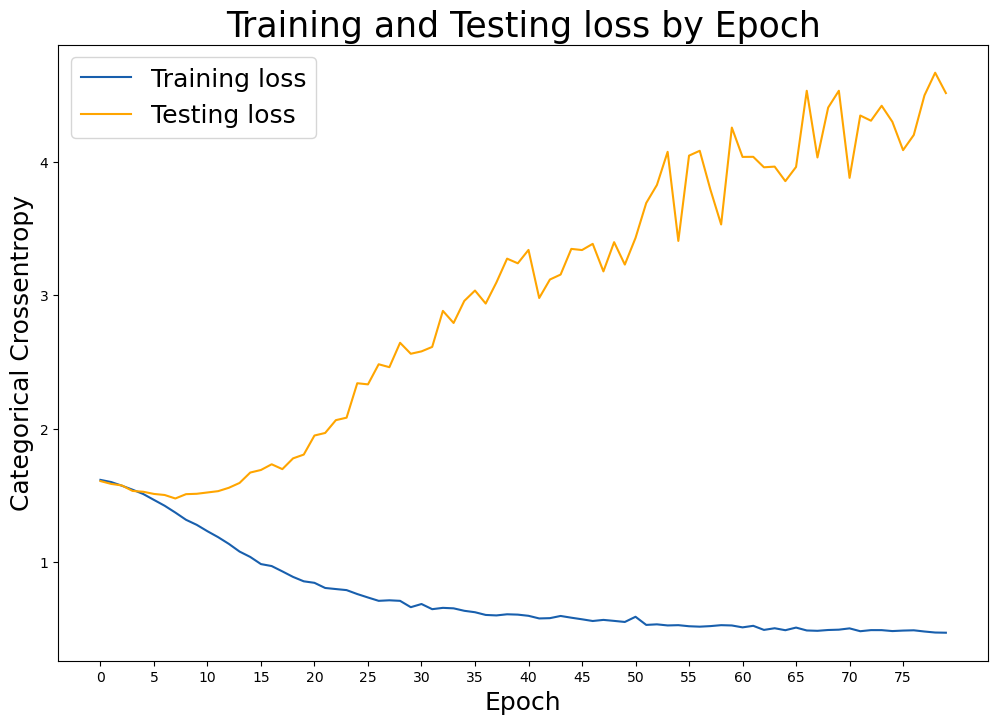

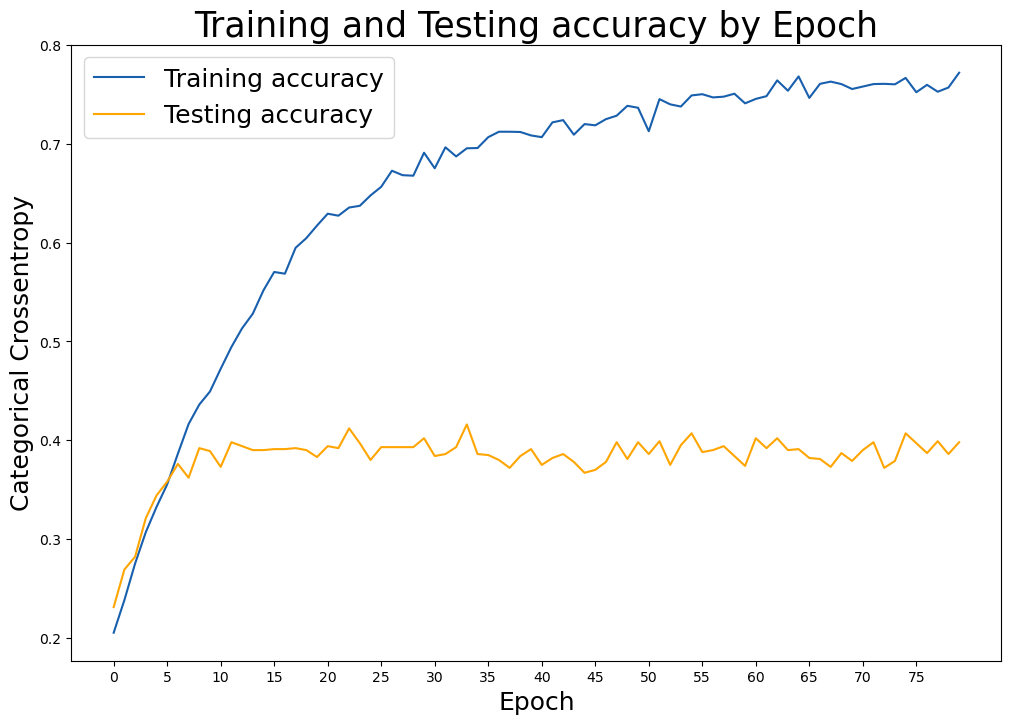

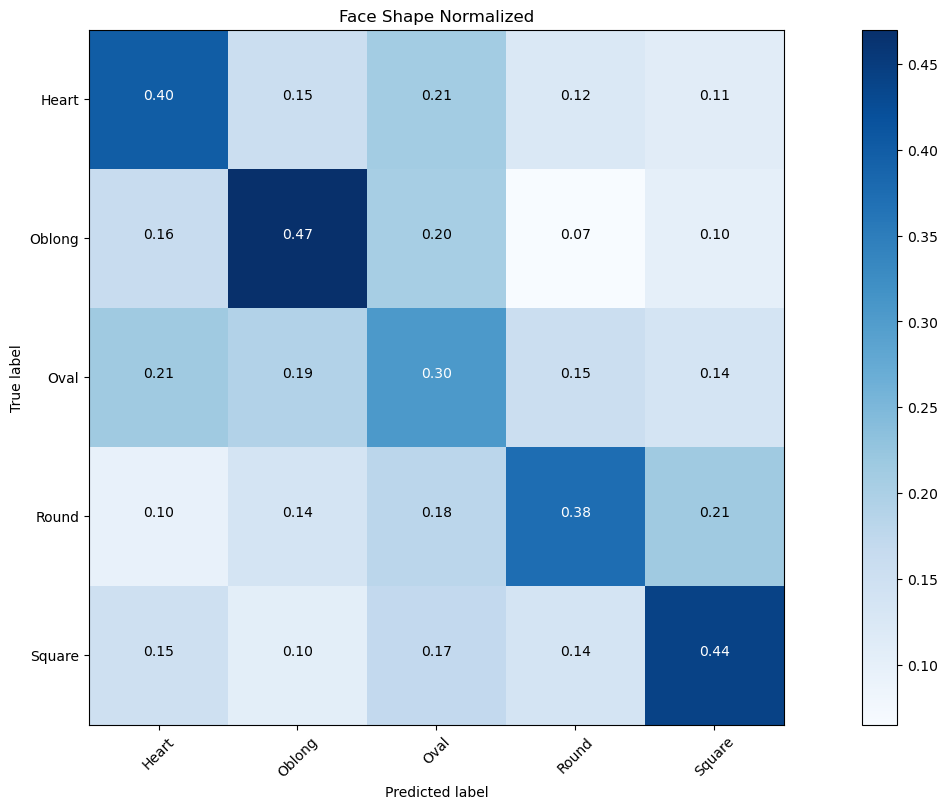

In [25]:
plot_summary_results(model_1, history_1, 80)

In [26]:
folder_path = 'C:/Users/whisn/FaceShape Dataset/saved_models/extra/'
filename = 'GRAYSCALE images - resize to 224x224.keras'

# Gabungkan folder dan nama file
model_path = folder_path + filename

# Simpan model
tf.keras.models.save_model(
    model_1, filepath=model_path, overwrite=True, include_optimizer=True
)


In [27]:
path = "C:/Users/whisn/FaceShape Dataset/data/"

# Pastikan path dan nama file digabung dengan benar
X_train = np.asarray(pickle.load(open(path + "X_train_apr.pickle", "rb")))
y_train = np.asarray(pickle.load(open(path + "y_train_apr.pickle", "rb")))
X_test = np.asarray(pickle.load(open(path + "X_test_apr.pickle", "rb")))
y_test = np.asarray(pickle.load(open(path + "y_test_apr.pickle", "rb")))

In [28]:
print("Data Summary")
print("--------------------")
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print("--------------------")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

Data Summary
--------------------
X_train shape (3999, 224, 224, 3)
y_train shape (3999, 5)
--------------------
X_test shape (1000, 224, 224, 3)
y_test shape (1000, 5)


In [29]:
# Model definition
model_2 = Sequential()

# Adding an explicit Input layer
model_2.add(Input(shape=X_train.shape[1:]))

# Adding convolutional and pooling layers
model_2.add(Conv2D(filters=8, kernel_size=3, activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening and dense layers
model_2.add(Flatten())
model_2.add(Dense(32, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(5, activation='softmax'))

# Compiling the model
model_2.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Model summary
model_2.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 222, 222, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 111, 111, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 109, 109, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 54, 54, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 52, 52, 64)          │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │         589,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 674,549 (2.57 MB)

 Trainable params: 674,549 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history_2 = model_2.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=100,
                        
                        validation_data=(X_test, y_test))

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 26s 158ms/step - accuracy: 0.2048 - loss: 1.6256 - val_accuracy: 0.2000 - val_loss: 1.6087
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 144ms/step - accuracy: 0.2097 - loss: 1.6059 - val_accuracy: 0.2320 - val_loss: 1.6015
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 145ms/step - accuracy: 0.2479 - loss: 1.6005 - val_accuracy: 0.2980 - val_loss: 1.5858
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 143ms/step - accuracy: 0.2895 - loss: 1.5790 - val_accuracy: 0.3080 - val_loss: 1.5573
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 142ms/step - accuracy: 0.2956 - loss: 1.5583 - val_accuracy: 0.3170 - val_loss: 1.5347
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 143ms/step - accuracy: 0.3411 - loss: 1.5085 - val_accuracy: 0.3390 - val_loss: 1.5087
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 144ms/step - accuracy: 0.3298 - loss: 1.4977 - val_accuracy: 0.3550 - val_loss: 1.5154
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 143ms/step - accuracy: 0.3483 -

In [31]:
# max validation score @ Epoch 38/150
max(history_2.history['val_accuracy'])

0.4869999885559082

In [32]:
model_2.evaluate(X_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.4576 - loss: 2.8241


[3.0463898181915283, 0.4580000042915344]

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step
Normalized confusion matrix
[[0.405 0.145 0.17  0.175 0.105]
 [0.14  0.635 0.12  0.03  0.075]
 [0.215 0.19  0.315 0.165 0.115]
 [0.1   0.115 0.17  0.435 0.18 ]
 [0.1   0.105 0.14  0.155 0.5  ]]


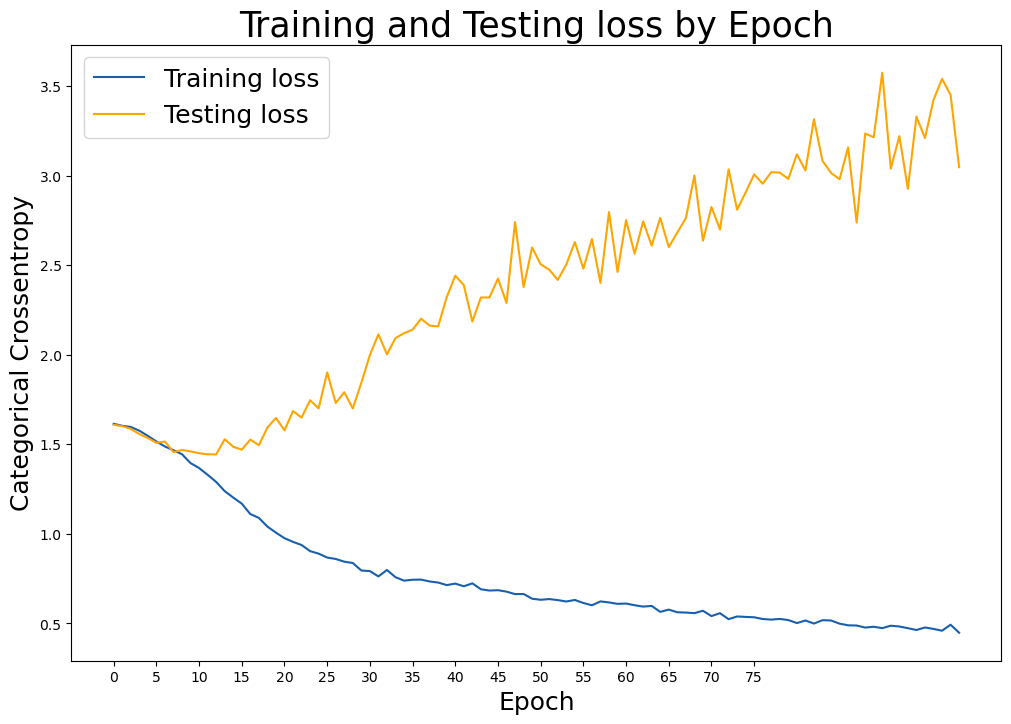

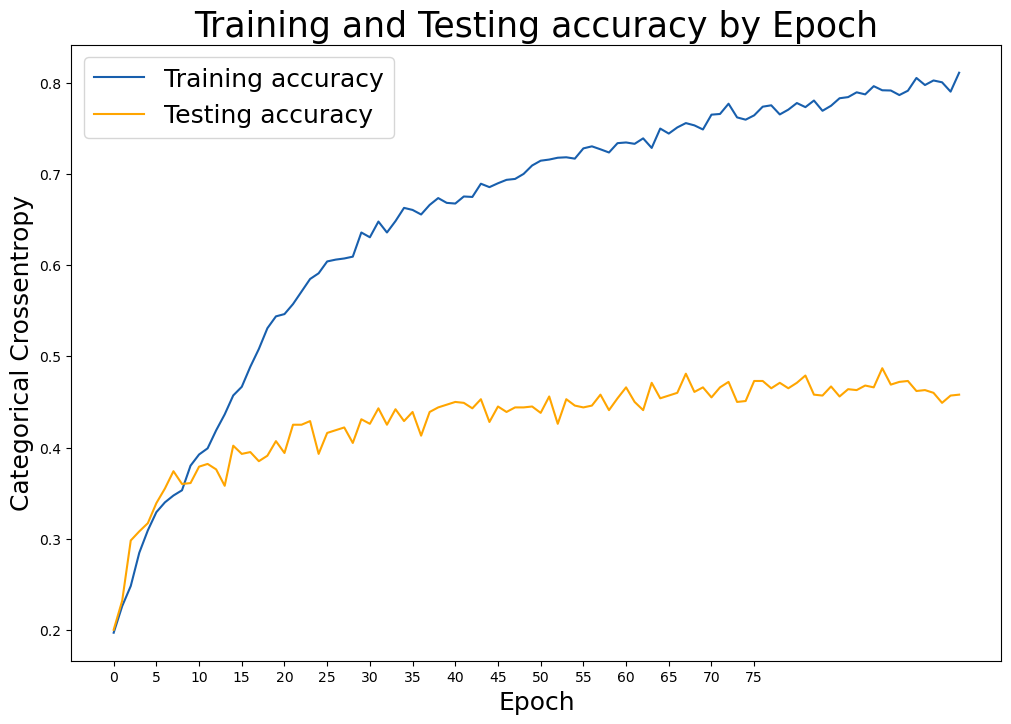

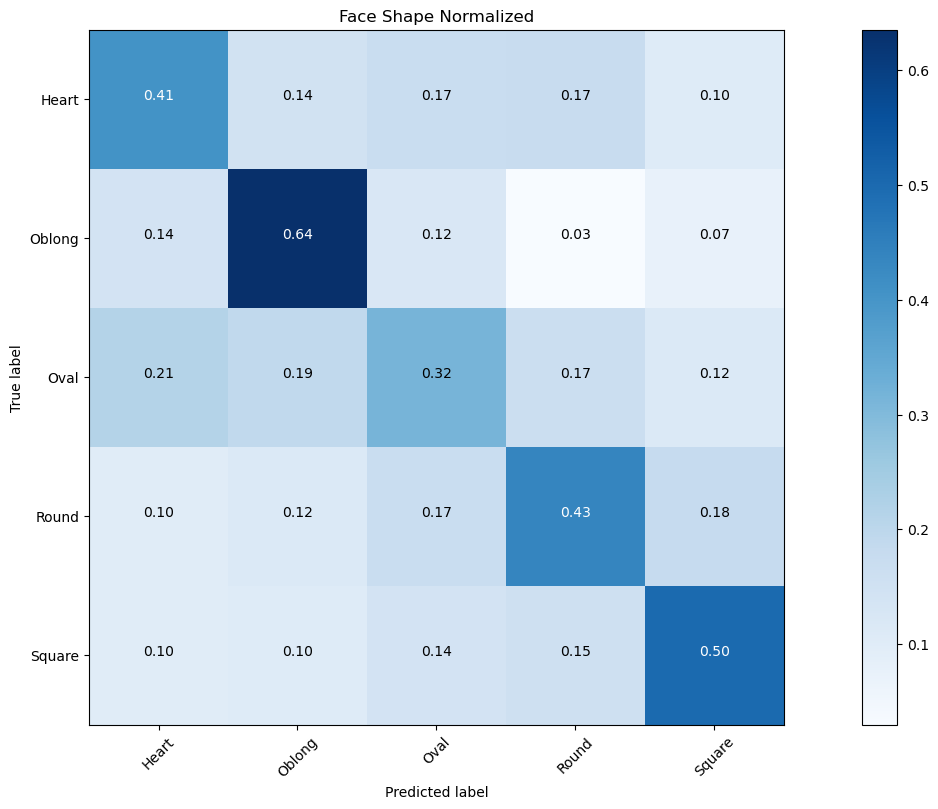

In [33]:
plot_summary_results(model_2, history_2, 80)

In [41]:
folder_path = 'C:/Users/whisn/FaceShape Dataset/saved_models/extra/'
filename = 'GRAYSCALE images - crop & resize keeping aspect ratio.keras'

# Gabungkan folder dan nama file
model_path = folder_path + filename

# Simpan model
tf.keras.models.save_model(
    model_2, filepath=model_path, overwrite=True, include_optimizer=True
)


In [34]:
path = "C:/Users/whisn/FaceShape Dataset/data/"

# Pastikan path dan nama file digabung dengan benar
X_train = np.asarray(pickle.load(open(path + "X_train_rgb.pickle", "rb")))
y_train = np.asarray(pickle.load(open(path + "y_train_rgb.pickle", "rb")))
X_test = np.asarray(pickle.load(open(path + "X_test_rgb.pickle", "rb")))
y_test = np.asarray(pickle.load(open(path + "y_test_rgb.pickle", "rb")))

In [35]:
print("Data Summary")
print("--------------------")
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print("--------------------")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")


Data Summary
--------------------
X_train shape (3999, 224, 224, 3)
y_train shape (3999, 5)
--------------------
X_test shape (1000, 224, 224, 3)
y_test shape (1000, 5)


In [37]:
model_3 = Sequential()
model_3.add(Conv2D(filters = 8,              # add this layer
                   kernel_size=3,
                   activation='relu',
                   input_shape=X_train.shape[1:]))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Conv2D(filters = 16,              # from 64
                   kernel_size=3,
                   activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Conv2D(filters = 64,             # from 128
                   kernel_size=3,
                   activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Conv2D(filters = 128,            # from 256
                   kernel_size=3,
                   activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Flatten())
model_3.add(Dense(32, activation='relu'))    # reduce from 128 to 64 to 32
model_3.add(Dropout(0.5))  ##added
model_3.add(Dense(5, activation='softmax'))

model_3.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 222, 222, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 111, 111, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 109, 109, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 54, 54, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 52, 52, 64)          │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │         589,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 674,549 (2.57 MB)

 Trainable params: 674,549 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
early_stop = EarlyStopping(monitor='val_loss', min_delta=0,  
                           patience=5, mode='auto')

In [40]:
history_3 = model_3.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=150,
                        validation_data=(X_test, y_test))

Epoch 1/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 24s 185ms/step - accuracy: 0.2022 - loss: 1.6095 - val_accuracy: 0.2010 - val_loss: 1.6081
Epoch 2/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 145ms/step - accuracy: 0.2251 - loss: 1.6035 - val_accuracy: 0.3230 - val_loss: 1.5496
Epoch 3/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 144ms/step - accuracy: 0.2895 - loss: 1.5544 - val_accuracy: 0.3390 - val_loss: 1.5430
Epoch 4/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 142ms/step - accuracy: 0.3522 - loss: 1.4986 - val_accuracy: 0.3700 - val_loss: 1.4696
Epoch 5/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 145ms/step - accuracy: 0.3524 - loss: 1.4642 - val_accuracy: 0.3810 - val_loss: 1.4539
Epoch 6/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 143ms/step - accuracy: 0.3585 - loss: 1.4261 - val_accuracy: 0.3920 - val_loss: 1.4136
Epoch 7/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 143ms/step - accuracy: 0.4214 - loss: 1.3367 - val_accuracy: 0.3960 - val_loss: 1.4145
Epoch 8/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 144ms/step - accuracy: 0.4316 -

In [43]:
# max validation score @ Epoch 38/150
max(history_3.history['val_accuracy'])

0.5

In [44]:
model_3.evaluate(X_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.4717 - loss: 4.2085


[3.879861354827881, 0.47600001096725464]

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step
Normalized confusion matrix
[[0.42  0.16  0.2   0.165 0.055]
 [0.16  0.535 0.175 0.05  0.08 ]
 [0.205 0.135 0.425 0.15  0.085]
 [0.125 0.05  0.16  0.455 0.21 ]
 [0.115 0.05  0.155 0.135 0.545]]


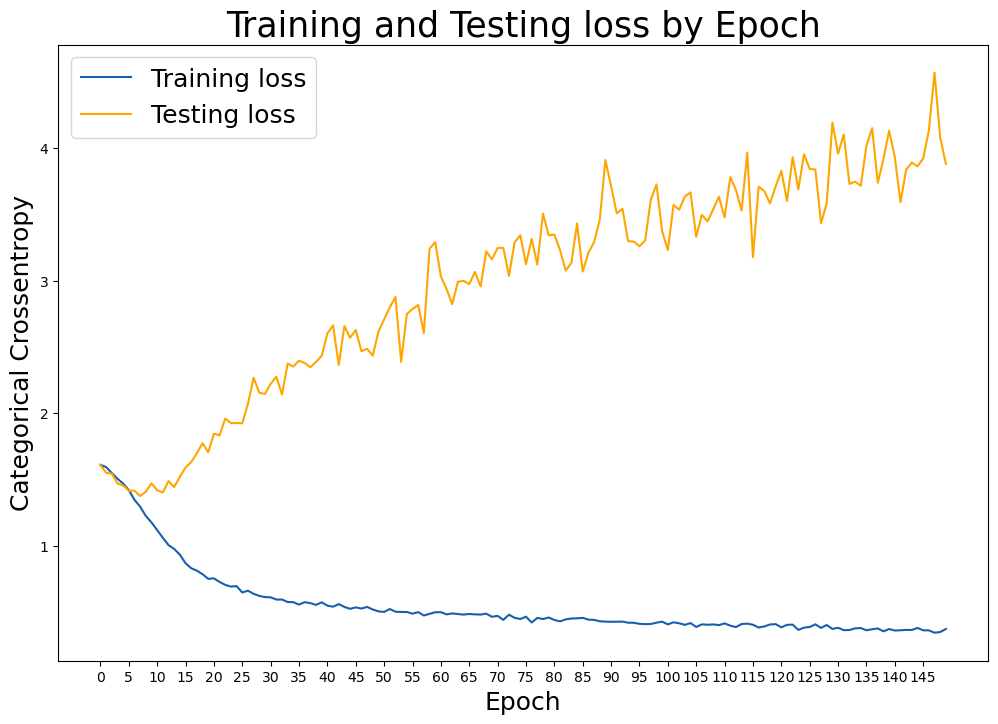

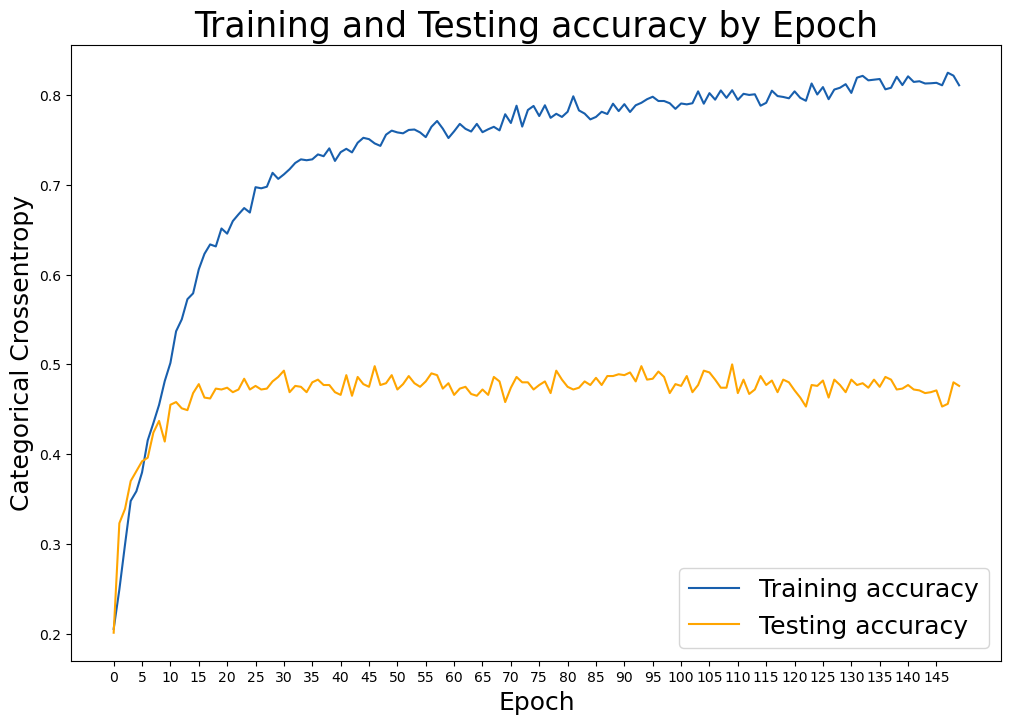

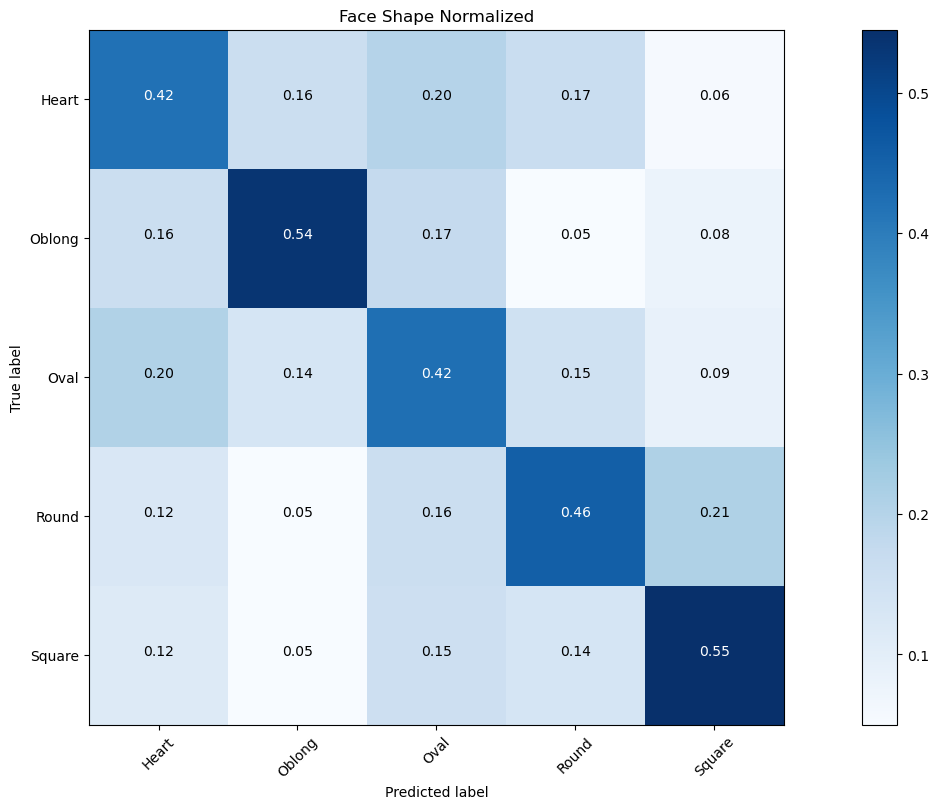

In [45]:
plot_summary_results(model_3, history_3, 150)

In [46]:
folder_path = 'C:/Users/whisn/FaceShape Dataset/saved_models/extra/'
filename = 'RGB COLOR images - Detect Face with Bounding Box.keras'

# Gabungkan folder dan nama file
model_path = folder_path + filename

# Simpan model
tf.keras.models.save_model(
    model_3, filepath=model_path, overwrite=True, include_optimizer=True
)


In [48]:
# Check if the file exists
if os.path.exists(model_path):
    print(f"File found: {model_path}")
    # Load the saved model
    loaded_model = tf.keras.models.load_model(model_path)
    print("Model loaded successfully!")
else:
    print(f"File not found: {model_path}")
    raise FileNotFoundError(f"The model file was not found at: {model_path}")

# Replace predict_classes with equivalent logic
def predict_classes(model, data):
    return np.argmax(model.predict(data), axis=-1)

# Get predictions for both models
# Ensure model_3 and X_test are defined beforehand
mod3_predict = predict_classes(model_3, X_test)
loaded4_predict = predict_classes(loaded_model, X_test)

# Check the difference
difference = np.sum(loaded4_predict - mod3_predict)
print(f'Difference in predictions: Saved model vs. original model is {difference}')


File found: C:/Users/whisn/FaceShape Dataset/saved_models/extra/RGB COLOR images - Detect Face with Bounding Box.keras
Model loaded successfully!
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step
Difference in predictions: Saved model vs. original model is 0
